In [1]:
%matplotlib inline

In [2]:
from pylab import*
import numpy as np

In [3]:
import sys
sys.path.append('\CVFIT')

In [4]:
from cvfit import fitting
from cvfit.fitting import SingleFitSession
from cvfit.fitting import MultipleFitSession

In [5]:
sets, fname = fitting.load_data(example=True)
print('File {0} loaded'.format(fname))
print('{0:d} sets found.'.format(len(sets)))
#sets = fitting.set_weights(sets)
for i in range(len(sets)):
    print ('\nSet #{0:d}:'.format(i+1))
    print (sets[i])

File C:\CVFIT./Example/Example.xlsx loaded
5 sets found.

Set #1:

X	Y	s(Y)	weight
30	54	0	1
100	538	0	1
300	2745	0	1
1000	6493	0	1
3000	8450	0	1
3000	9793	0	1
3000	9647	0	1
3000	10023	0	1
3000	9025	0	1
3000	9341	0	1
10000	10349	0	1
10000	10467	0	1
30000	11527	0	1
30000	10946	0	1


Set #2:

X	Y	s(Y)	weight
30	91	0	1
100	645	0	1
300	2460	0	1
600	3592	0	1
1000	4369	0	1
1000	4598	0	1
1000	4752	0	1
1000	4724	0	1
1000	4412	0	1
3000	6430	0	1
10000	7227	0	1
30000	7970	0	1
30000	7976	0	1


Set #3:

X	Y	s(Y)	weight
100	1731	0	1
300	7829	0	1
600	11922	0	1
1000	14397	0	1
3000	16500	0	1
3000	17804	0	1
3000	18528	0	1
3000	18820	0	1
10000	18818	0	1
30000	19593.5	0	1


Set #4:

X	Y	s(Y)	weight
30	305	0	1
100	1856	0	1
300	7834.5	0	1
600	8970	0	1
600	9534	0	1
600	11256	0	1
600	10424	0	1
600	12133	0	1
1000	13201	0	1
3000	16686	0	1
10000	17145	0	1
30000	16329	0	1


Set #5:

X	Y	s(Y)	weight
100	980	0	1
300	3193	0	1
600	4949	0	1
1000	4806	0	1
1000	6183	0	1
1000	6188	0	1
1000	6162	0	1
1000	6355	0	1
1000	619

In [6]:
eqname = 'Hill'
from cvfit.equations import Hill

# Example of single fit session.

In [7]:
eq = Hill(eqname)
fs = SingleFitSession(sets[0], eq)


	Fitting session for Set 1 initialised!

In [8]:
fs.fit()

In [9]:
fs.calculate_errors()
print(fs.string_estimates())
print(fs.string_liklimits())

Number of point fitted = 14
Number of parameters estimated = 3
Degrees of freedom = 11
Residual error SD = 446.029      (variance = 198941.810)
Parameter 1: Ymin  	= 0  	  (fixed)
Parameter 2: Ymax  	= 11124.1  	  Approx SD = 297.241	  CV = 2.7
Parameter 3: EC50  	= 773.58  	  Approx SD = 80.5618	  CV = 10.4
Parameter 4: nH    	= 1.23848  	  Approx SD = 0.118585	  CV = 9.6
Minimum SSD = 2188359.915; 
Max log-likelihood = -103.582
Correlation matrix = [!!!! PRINTOUT OF CORRELATION MATRIX NOT IMPLEMENTED YET. SORRY.


LIKELIHOOD INTERVALS
2.42-unit Likelihood Intervals  (equivalent SD for Gaussian- 2.2)
Lmax= -103.582;   Lcrit= -106.005
Parameter 1:   Ymin	= 0	  (fixed)
Parameter 2:   Ymax	= 11124.1	  LOWER = 10528.6	  UPPER = 11807.7
Parameter 3:   EC50	= 773.58	  LOWER = 614.965	  UPPER = 958.862
Parameter 4:   nH  	= 1.23848	  LOWER = 1.01316	  UPPER = 1.5316


# Example of multiple fit session

In [10]:
fits = MultipleFitSession()
for dataset in sets:
    eq = Hill(eqname)
    fs = SingleFitSession(dataset, eq)
    fits.add(fs)


	Fitting session for Set 1 initialised!
	Fitting session for Set 2 initialised!
	Fitting session for Set 3 initialised!
	Fitting session for Set 4 initialised!
	Fitting session for Set 5 initialised!

In [11]:
for fs in fits.list:
    print("\n\tSTART FITTING ===============")
    fs.fit()
    fs.calculate_errors()
    print(fs.string_estimates())
    print(fs.string_liklimits())
    print("\n\tFITTING FINISHED ============")
print ("\nFINISHED FITTING ALL SETS")
    


	START FITTING ===============
Number of point fitted = 14
Number of parameters estimated = 3
Degrees of freedom = 11
Residual error SD = 446.029      (variance = 198941.810)
Parameter 1: Ymin  	= 0  	  (fixed)
Parameter 2: Ymax  	= 11124.1  	  Approx SD = 297.241	  CV = 2.7
Parameter 3: EC50  	= 773.58  	  Approx SD = 80.5618	  CV = 10.4
Parameter 4: nH    	= 1.23848  	  Approx SD = 0.118585	  CV = 9.6
Minimum SSD = 2188359.915; 
Max log-likelihood = -103.582
Correlation matrix = [!!!! PRINTOUT OF CORRELATION MATRIX NOT IMPLEMENTED YET. SORRY.


LIKELIHOOD INTERVALS
2.42-unit Likelihood Intervals  (equivalent SD for Gaussian- 2.2)
Lmax= -103.582;   Lcrit= -106.005
Parameter 1:   Ymin	= 0	  (fixed)
Parameter 2:   Ymax	= 11124.1	  LOWER = 10528.6	  UPPER = 11807.7
Parameter 3:   EC50	= 773.58	  LOWER = 614.965	  UPPER = 958.862
Parameter 4:   nH  	= 1.23848	  LOWER = 1.01316	  UPPER = 1.5316

	FITTING FINISHED ============

	START FITTING ===============
Number of point fitted = 13
Num

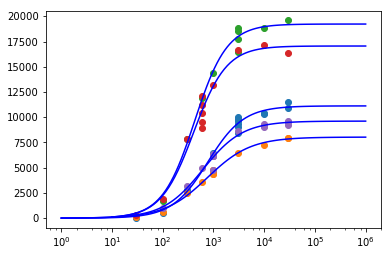

In [12]:
fplots = fits.prepare_fplot('fit')
for set in sets:
    semilogx(set.X, set.Y, 'o', label=set.title)
for fp in fplots:
    semilogx(fp[0], fp[1], 'b-')
show()